# **0. Subir el Dataset, limpiarlo y darle formato a sus columnas**

Inicialmente se cargaron las librerias necesarias en el proceso de tratamiento de la base. Para facilitar el trabajo en Colab, se ubico el Dataset en el drive del equipo y se extrajo el link de este, de esta manera no tendrá que descargarse y subir cada vez que se ejecute el código. Se le asigna un nombre más sencillo para facilidad de manejo y se verifica que carga correctamente ejecutando el código.

In [1]:
import gdown    # Libreria para importar desde Google Drive el dataset

import pandas as pd   # Para el manejo de la base de datos

import matplotlib.pyplot as plt   # Para graficar
import seaborn as sns   # Para graficar

In [2]:
file_id = "1PyveXXGr1VmjGV9mrsTb7NWsHPWnGhnz"   # Extraer del link de Drive 🔄

url = f"https://drive.google.com/uc?id={file_id}"   # Se le asigna un nombre más fácil de manejar al archivo de Drive

df_ZNI = pd.read_csv(gdown.download(url, quiet=False))    # Carga la base y lee los datos según la forma como están codificados

Downloading...
From: https://drive.google.com/uc?id=1PyveXXGr1VmjGV9mrsTb7NWsHPWnGhnz
To: /content/Estado_de_la_prestaci_n_del_servicio_de_energ_a_en_Zonas_No_Interconectadas_20250727.csv
100%|██████████| 653k/653k [00:00<00:00, 120MB/s]


In [3]:
print(f"Dataset cargado: {df_ZNI.shape}")   # Lee el número de filas y columnas que tiene la abse de datos

df_ZNI.tail(3)    # Verifica que se cargan correctamente los datos extrayendo una parte de esta

Dataset cargado: (4660, 14)


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
4657,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA,2025,3,45876,12716.0,134.82,jueves,03/20/2025 06:30:00 PM,14.51
4658,99,VICHADA,99001,PUERTO CARREÑO,99001000,PUERTO CARREÑO,2025,3,3125928,768017.0,5734.08,jueves,03/13/2025 02:00:00 PM,23.69
4659,99,VICHADA,99773,CUMARIBO,99773000,CUMARIBO,2025,3,426253,150920.0,831.79,miércoles,03/26/2025 03:00:00 PM,23.73


## **Guía de Conceptos clave**
A continuación se presenta una tabla con las variables principales que se usarán a lo largo de todo el análisis junto con una pequeña definición de cada una para tener claridad de los datos con los que se trabajarán:


| Columna                    | Explicación                                                                |
| -------------------------- | ------------------------------------------------------------------------------- |
| `ENERGÍA ACTIVA`           | Es la energía **realmente utilizada** para hacer funcionar aparatos eléctricos. |
| `ENERGÍA REACTIVA`         | Es energía que **va y viene** sin usarse, causada por motores, neveras, etc.    |
| `POTENCIA MÁXIMA`          | Es el **pico más alto de consumo** registrado en un momento específico del mes. |
| `PROMEDIO DIARIO EN HORAS` | Cuántas horas al día hubo servicio eléctrico.                                   |




In [4]:
df_ZNI.dtypes   # Es importante reconocer el tipo datos para su tratamiento

,0
ID DEPATAMENTO,int64
DEPARTAMENTO,object
ID MUNICIPIO,int64
MUNICIPIO,object
ID LOCALIDAD,int64
LOCALIDAD,object
AÑO SERVICIO,int64
MES SERVICIO,int64
ENERGÍA ACTIVA,int64
ENERGÍA REACTIVA,float64


# **1. Ajuste y limpieza del Dataset**

En esta sección se identificaron los distinos obstáculos y se corrigieron con el objetivo de evitar posibles errores  para el correcto tratamiento de la base de datos

### **Corrección Datos de ubicación (Departamento, municipio y localidad)**

In [5]:
# Como hay muchas columnas, decidimos que para identificar Departamento, Municipio y Localidad solo dejaríamos {Departamento, Municipio, ID_Localidad }
# Excluyendo las columnas de ID_municipio, ID_departamento y nombre_localidad

df_ZNI['ID DEPATAMENTO'].value_counts(dropna=False)   #Alguien colocó en el ID departamento "0", hay que revisarlo

,count
ID DEPATAMENTO,
27,1345
52,861
19,675
99,215
18,215
97,179
76,178
91,170
13,151


Se identificó que uno de los datos en la base no se le asigno número de ID, se procedió a buscar qué dato era este y a corregir el error:

In [6]:
filtro1 = df_ZNI[df_ZNI['ID DEPATAMENTO'] == 0]   # Filtra la base para identificar el dato que tiene ID = 0

filtro1

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
1231,0,CAUCA,19809,TIMBIQUÍ,19809014,CHACÓN (TIMBIQUÍ - CAUCA),2023,2,3457,909.0,25.76,lunes,02/06/2023 07:00:00 PM,5.57


Al identificar que este dato pertenece al departamento del Cauca, se le asigna el ID que le pertenece

In [7]:
filtro2 = df_ZNI[df_ZNI['DEPARTAMENTO'] == "CAUCA"]  # Busca cuál es el ID  del departamento del Cauca

filtro2['ID DEPATAMENTO'].head(2)

,ID DEPATAMENTO
9,19
10,19


In [8]:
df_ZNI['ID DEPATAMENTO'].replace(0, 19, inplace=True)   # Reemplaza el 0 por el número de ID real que le pertenece al departamento 🔄

/tmp/ipython-input-1665350459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ZNI['ID DEPATAMENTO'].replace(0, 19, inplace=True)   # Reemplaza el 0 por el número de ID real que le pertenece al departamento 🔄


In [9]:
df_ZNI['ID DEPATAMENTO'].value_counts()   # Verifica que se haya efectuado el cambio

,count
ID DEPATAMENTO,
27,1345
52,861
19,676
18,215
99,215
97,179
76,178
91,170
13,151


Otro error que se pudo identificar es en cuestión de ortografía. Hubo datos en los cuales la base no tomó las tildes que tienen algunos departamentos, por lo que asumió que eran datos distintos. En está ocasión se procedió a crear un diccionario con la forma escrita correcta de los departamentos en la base y que quedaran con una única clasificación por cada uno. x

In [10]:
df_ZNI['DEPARTAMENTO'].value_counts(dropna=False).sort_index()    # Muestra los departamentos como índices y el número de datos que contiene cada uno

,count
DEPARTAMENTO,
AMAZONAS,170
ANTIOQUIA,95
ARCHIPIELAGO DE SAN ANDRES,2
ARCHIPIÉLAGO DE SAN ANDRÉS,6
ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,28
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",65
BOLIVAR,3
BOLÍVAR,148
CAQUETA,3


In [11]:
# Creación del diccionario con cada uno de los departamentos (con sus nombres correctos) y sus respectivo ID

dicc_num_dpto = {27:"CHOCÓ", 52:"NARIÑO",	19:"CAUCA",	18:"CAQUETÁ",	99:"VICHADA",	97:"VAUPÉS", 76:"VALLE DEL CAUCA",
                 91:"AMAZONAS",	13:"BOLÍVAR",	94:"GUAINÍA",	88:"SAN ANDRÉS, P & SC",
                 	5:"ANTIOQUIA",	86:"PUTUMAYO",	47:"MAGDALENA",	50:"META",	95:"GUAVIARE",	44:"LA GUAJIRA",	85:"CASANARE"}

df_ZNI['ID DEPATAMENTO'].replace(dicc_num_dpto,inplace=True)

df_ZNI.head(2)

/tmp/ipython-input-1162559625.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ZNI['ID DEPATAMENTO'].replace(dicc_num_dpto,inplace=True)


,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,AMAZONAS,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.0
1,AMAZONAS,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.0


In [12]:
import re  #Como son más de 500 municipios, se optó por corregir sus nombres usando la librería re

def mejor_nombre(nombres):
    # Prioriza nombres con tildes, luego por longitud
    return max(nombres, key=lambda x: (bool(re.search(r'[áéíóúüñ]', x.lower())), len(x)))

df_ZNI['MUNICIPIO'] = df_ZNI.groupby('ID MUNICIPIO')['MUNICIPIO'].transform(lambda x: mejor_nombre(x.unique()))

In [13]:
filtro3 = df_ZNI[df_ZNI['MUNICIPIO'].str.startswith("PROVID")]
filtro3.head(4)

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
3,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
86,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,7,1308682,275839.0,2229.81,Miercoles,07/10/2024 10:30:00 PM,24.00
162,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,5,1331271,284638.0,2190.28,Viernes,05/10/2024 03:00:00 PM,23.59
234,"SAN ANDRÉS, P & SC",ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,1,1209660,254221.0,2028.26,Jueves,01/04/2024 09:30:00 PM,23.57


In [14]:
df_ZNI.drop(['DEPARTAMENTO', 'ID MUNICIPIO', 'LOCALIDAD', 'FECHA DE DEMANDA MÁXIMA', 'DÍA DE DEMANDA MÁXIMA'], axis=1, inplace=True) #Se eliminaron las columnas que NO se van a usar
df_ZNI.head(1)

,ID DEPATAMENTO,MUNICIPIO,ID LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.0


In [15]:
# Se le cambió el nombre a las columnas por practicidad

df_ZNI.rename(columns={"ID DEPATAMENTO": "Departamento",
                       "MUNICIPIO": "Municipio", "AÑO SERVICIO": "Año",
                       "MES SERVICIO":"Mes", "ID LOCALIDAD": "Localidad",
                       "PROMEDIO DIARIO EN HORAS":"hrs/dia_servicio", 'ENERGÍA ACTIVA': 'energ_act',
                       'ENERGÍA REACTIVA': 'energ_react', 'POTENCIA MÁXIMA': 'potencia_max'},
                         inplace=True)
df_ZNI.head(4)

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,2024,6,127838,40378.0,256.00,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,2024,6,26578,11917.0,101.43,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,2024,6,1284196,274864.0,2241.56,24.00


In [16]:
# Para contar el número de registros de cada año:
conteo_por_año = df_ZNI['Año'].value_counts().sort_index()
print(conteo_por_año)


Año
2020    925
2021    984
2022    907
2023    882
2024    893
2025     69
Name: count, dtype: int64


In [17]:
# Dado que la información del año 2025 aún no está completa y los registros son muy escasos,
# se optó por excluírlos del análisis.
df_ZNI = df_ZNI[df_ZNI['Año'] != 2025]


In [18]:
# Se mirará que localidades no tienen registros todos los años

años_esperados = set([2020, 2021, 2022, 2023, 2024])
localidades_años = df_ZNI.groupby('Localidad')['Año'].apply(set)

# Filtrar las localidades que NO tienen todos los años esperados
localidades_incompletas = localidades_años[localidades_años.apply(lambda x: x != años_esperados)].index
df_localidades_incompletas = df_ZNI[df_ZNI['Localidad'].isin(localidades_incompletas)]
num_localidades_incompletas = len(localidades_incompletas)
print(f"Número de localidades con años faltantes: {num_localidades_incompletas} \n")

print(f"Número de municipios con localidades incompletas: {df_localidades_incompletas['Municipio'].nunique()}")
print(df_localidades_incompletas['Departamento'].unique())


Número de localidades con años faltantes: 82 

Número de municipios con localidades incompletas: 32
['CHOCÓ' 'GUAINÍA' 'LA GUAJIRA' 'NARIÑO' 'VALLE DEL CAUCA' 'ANTIOQUIA'
 'CAQUETÁ' 'CAUCA' 'VICHADA' 'CASANARE']


In [19]:
# Para visualizar cuantos de los registros se hacen a lo largo de todo el período 2020-2024
años_esperados = [2020, 2021, 2022, 2023, 2024]

def clasificar_localidad(años):
    años_ordenados = sorted(años)
    indices = [años_esperados.index(a) for a in años_ordenados if a in años_esperados]
    if indices == list(range(5)):
        return "Completa (2020-2024)"
    if indices == list(range(len(indices))) and indices[0] == 0:
        return "Corte al final"
    if indices == list(range(5 - len(indices), 5)) and indices[-1] == 4:
        return "Inicio tardío"

    return "Registros incompletos"

clasificaciones = df_ZNI.groupby('Localidad')['Año'].apply(lambda x: clasificar_localidad(set(x)))

df_clasificaciones = clasificaciones.reset_index(name='Clasificación_ZNI')
conteo_clasificaciones = df_clasificaciones['Clasificación_ZNI'].value_counts()
print(conteo_clasificaciones)



Clasificación_ZNI
Completa (2020-2024)     71
Inicio tardío            42
Corte al final           23
Registros incompletos    17
Name: count, dtype: int64


### **Gráficas exploratorias**


Posibles apagones detectados: 228 registros
       Departamento             Municipio   Año  Mes  potencia_max
23            CHOCÓ  BAJO BAUDÓ (PIZARRO)  2024    6          7.21
25            CHOCÓ  BAJO BAUDÓ (PIZARRO)  2024    6          6.24
36            CHOCÓ                 NUQUÍ  2024    6          5.35
40            CHOCÓ              RIOSUCIO  2024    6          4.33
50           NARIÑO             EL CHARCO  2024    6          6.43
53           NARIÑO               LA TOLA  2024    6          9.50
58           NARIÑO                 MAGÜÍ  2024    6          0.00
59           NARIÑO                 MAGÜÍ  2024    6          0.00
60           NARIÑO              MOSQUERA  2024    6         10.20
68  VALLE DEL CAUCA          BUENAVENTURA  2024    6          9.86


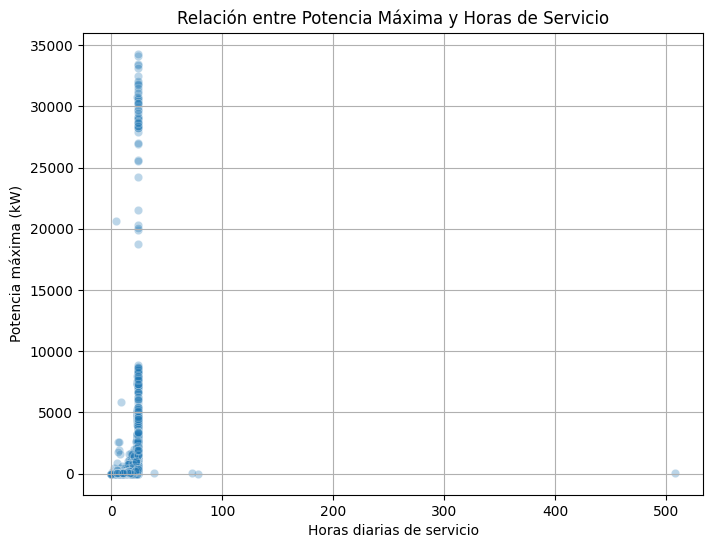

    hrs/dia_servicio
23              5.51
25              5.57
36              7.07
40              4.29
50              3.43
53              3.27
58              0.00
59              0.00
60              7.03
68              9.42


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- TABLA DE APAGONES ----------
apagones = df_ZNI[
    (df_ZNI["potencia_max"] < df_ZNI["potencia_max"].quantile(0.05)) &
    (df_ZNI["hrs/dia_servicio"] < 12)
]
print(f"\nPosibles apagones detectados: {len(apagones)} registros")
print(apagones[["Departamento","Municipio","Año","Mes","potencia_max"]].head(10))

# ---------- TERCERA IMAGEN ----------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="hrs/dia_servicio",
    y="potencia_max",
    data=df_ZNI,
    alpha=0.3
)
plt.title("Relación entre Potencia Máxima y Horas de Servicio")
plt.xlabel("Horas diarias de servicio")
plt.ylabel("Potencia máxima (kW)")
plt.grid()
plt.show()

# ---------- MOSTRAR TABLA DE HORAS DE SERVICIO ----------
print(apagones[["hrs/dia_servicio"]].head(10))


 ¿Qué permitirá esto?
 Ver la distribución de la potencia máxima → municipios con mayor o menor demanda pico.
 Identificar registros sospechosos (cortes de energía o anomalías).
 Comparar departamentos y tendencias en el tiempo.
 Relacionar la potencia con el servicio real para ver dónde hay más cortes.

Se decidió que para el análisis posterior las columnas que se necesitarán son: Departamento, Municipio, ID Localidad, Año, Mes, Energía Activa, Energía Reactiva

In [21]:
# Filtrar solo las localidades que tengan registro en TODOS los 12 meses del año
num_localidades = len(df_ZNI['Localidad'].unique())
print(f"Número de localidades: {num_localidades}")
filtro4 = df_ZNI[df_ZNI['Mes'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]
filtro5 = df_ZNI[df_ZNI['Mes'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]
filtro5['Localidad'].nunique()

Número de localidades: 153


153

### **Corrreción Datos del promedio de horas**

In [22]:
#df_ZNI['Municipio'].values_counts()

Para corregir los datos del promedio de horas diarias del servicio electrico, primero filtramos los datos, unificamos los datos de la columna utilizando las mismas unidades, reemplazando las comas por puntos para facilitar las operaciones.

In [23]:
#voy a tomar aca solo localidad, promedio diario en horas, mes y año de servicio
df_ZNI_hprom = df_ZNI[['Departamento', 'Municipio', 'Localidad','Mes', 'Año','hrs/dia_servicio']]
df_ZNI_hprom.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,6,2024,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,6,2024,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,6,2024,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,6,2024,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,6,2024,9.40


In [24]:
#hago limpieza de los datos de la columna de prom. horas diarias
df_ZNI_hprom['hrs/dia_servicio'] = df_ZNI_hprom['hrs/dia_servicio'].replace(',', '.')
df_ZNI_hprom['hrs/dia_servicio'].head(3)

/tmp/ipython-input-736689231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ZNI_hprom['hrs/dia_servicio'] = df_ZNI_hprom['hrs/dia_servicio'].replace(',', '.')


,hrs/dia_servicio
0,24.00
1,24.00
2,10.18


A continuación, identificamos los datos atípicos o erróneos, es decir, aquellas filas en las que el promedio de horas diarias excede las 24 horas, lo cual resulta incoherente desde un punto de vista lógico.

In [25]:
#encuentro datos erroneos con promedio de horas diarias mayores a 24
df_ZNI_hprom[df_ZNI_hprom['hrs/dia_servicio'] > 24]

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
531,CAUCA,TIMBIQUÍ,19809007,12,2023,38.54
1061,ANTIOQUIA,VIGÍA DEL FUERTE,5873002,4,2023,508.00
1276,NARIÑO,MAGÜÍ,52427913,2,2023,78.00
2858,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,6,2021,72.40


Una vez identificados los datos erróneos en el documento, reemplazamos cada valor atípico por el promedio de los datos correspondientes a los demás meses del año en la misma localidad.

In [26]:
# Se convirtieron los valores atípicos de la columna hrs/dia_servicio en el promedio de los registros de esa columna
# para esa misma localidad y en ese mismo año, ya que a lo largo de los meses este parámetro no tiende a variar significativamente
# y en este caso eliminar el registro completo afectaría la información de las demás variables energéticas.

media_año = df_ZNI[df_ZNI['hrs/dia_servicio'] <= 24].groupby(['Localidad', 'Año'])['hrs/dia_servicio'].transform('mean')
df_ZNI.loc[df_ZNI['hrs/dia_servicio'] > 24, 'hrs/dia_servicio'] = media_año

df_ZNI[df_ZNI['hrs/dia_servicio'] > 24] # --> Se eliminaron los valores atípicos

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio


##### **Localidad Bojayá - Chocó (27099005)**

In [27]:
#En la localidad 27099005 mostrar todos los meses del año 2021
df_ZNI_hprom[(df_ZNI_hprom['Localidad'] == 27099005) & (df_ZNI_hprom['Año'] == 2021)]

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
2335,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,12,2021,5.13
2421,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,11,2021,5.53
2507,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,10,2021,4.49
2594,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,9,2021,3.41
2679,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,8,2021,6.43
2768,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,7,2021,6.12
2858,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,6,2021,72.40
2911,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,5,2021,7.35
2992,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,4,2021,7.14
3077,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,3,2021,5.46


In [28]:
df_localidad_bojaya = df_ZNI_hprom[df_ZNI_hprom['Localidad'] == 27099005]
df_localidad_bojaya.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
29,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,6,2024,6.20
115,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,7,2024,6.16
185,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,5,2024,7.39
271,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,1,2024,8.08
350,CHOCÓ,BOJAYÁ (BELLAVISTA),27099005,2,2024,7.43


In [29]:
df_localidad_bojaya.count()

,0
Departamento,45
Municipio,45
Localidad,45
Mes,45
Año,45
hrs/dia_servicio,45


##### **Localidad Timbiquí - Cauca (19809007)**

In [30]:
#En la localidad 19809007 mostrar todos los meses del año 2023
df_ZNI_hprom[(df_ZNI_hprom['Localidad'] == 19809007) & (df_ZNI['Año'] == 2023)]

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
531,CAUCA,TIMBIQUÍ,19809007,12,2023,38.54
613,CAUCA,TIMBIQUÍ,19809007,11,2023,6.15
668,CAUCA,TIMBIQUÍ,19809007,10,2023,7.15


In [31]:
# Datos de la localidad 19809007
df_localidad_timbiqui = df_ZNI_hprom[df_ZNI_hprom['Localidad'] == 19809007]
df_localidad_timbiqui.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
15,CAUCA,TIMBIQUÍ,19809007,6,2024,7.38
98,CAUCA,TIMBIQUÍ,19809007,7,2024,6.49
169,CAUCA,TIMBIQUÍ,19809007,5,2024,7.08
257,CAUCA,TIMBIQUÍ,19809007,1,2024,7.33
531,CAUCA,TIMBIQUÍ,19809007,12,2023,38.54


/tmp/ipython-input-3775838646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localidad_timbiqui['Fecha'] = pd.to_datetime(df_localidad_timbiqui['Año'].astype(str) + '-' + df_localidad_timbiqui['Mes'].astype(str))


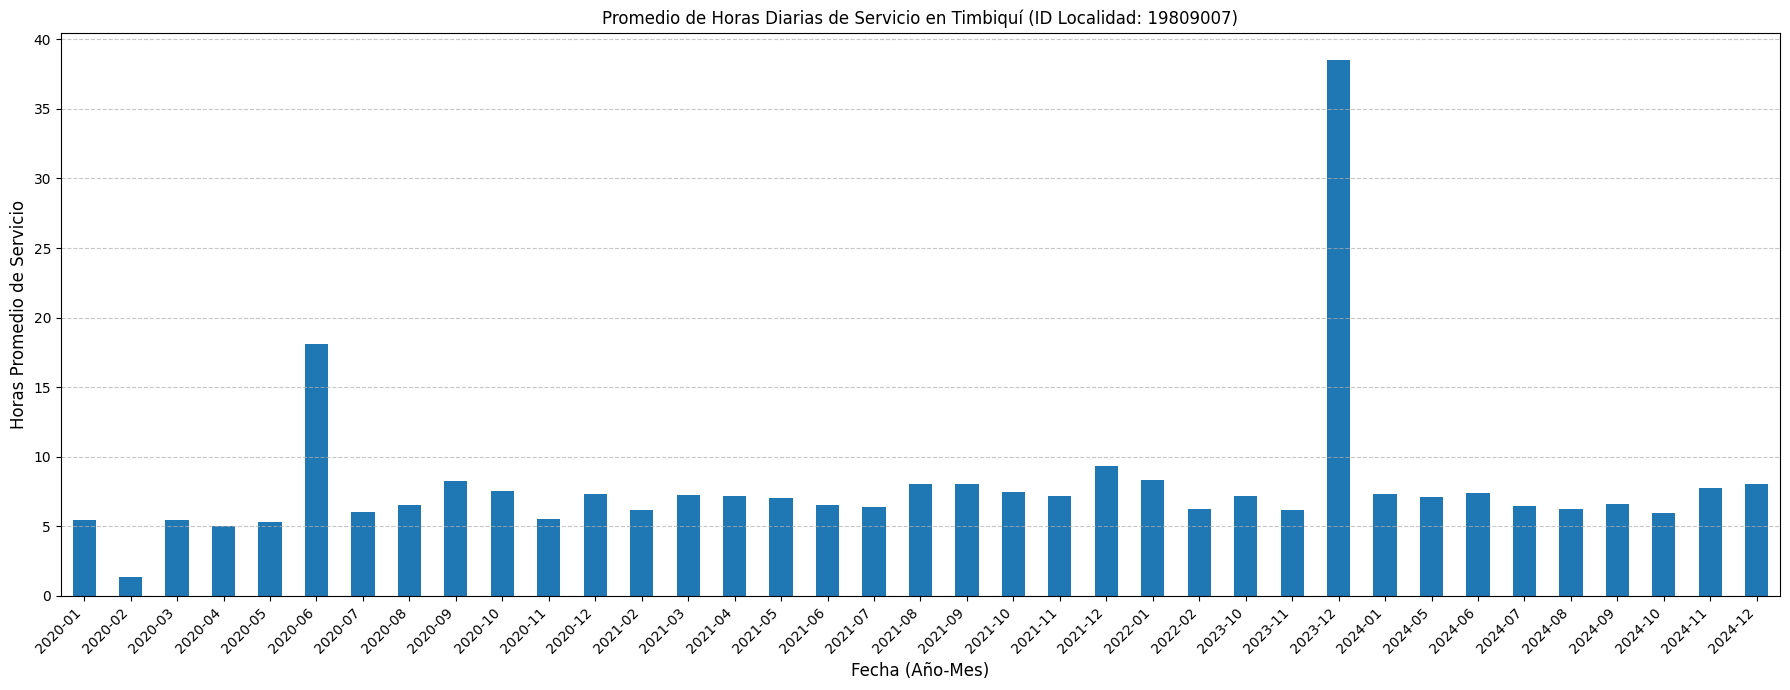

In [32]:
#Hago grafico de los datos de la localidad 19809007 timbiqui
# Crear una columna de fecha para graficar correctamente en orden cronológico
df_localidad_timbiqui['Fecha'] = pd.to_datetime(df_localidad_timbiqui['Año'].astype(str) + '-' + df_localidad_timbiqui['Mes'].astype(str))
df_localidad_timbiqui = df_localidad_timbiqui.sort_values('Fecha')

# Formatear la fecha como texto para un mejor control sobre las etiquetas del eje X
df_localidad_timbiqui['Fecha_str'] = df_localidad_timbiqui['Fecha'].dt.strftime('%Y-%m')


# Graficar usando la nueva columna de fecha y mejorar la visualización
ax = df_localidad_timbiqui.plot(
    x='Fecha_str',
    y='hrs/dia_servicio',
    kind='bar',
    figsize=(18, 7),  # Aumentar el tamaño para mayor claridad
    legend=False,
    title='Promedio de Horas Diarias de Servicio en Timbiquí (ID Localidad: 19809007)'
)

# Mejorar las etiquetas y el diseño del gráfico
ax.set_xlabel("Fecha (Año-Mes)", fontsize=12)
ax.set_ylabel("Horas Promedio de Servicio", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para evitar solapamiento
plt.tight_layout()  # Ajustar para que todo quepa correctamente
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una grilla para facilitar la lectura
plt.show()

In [33]:
df_localidad_timbiqui.count()

,0
Departamento,37
Municipio,37
Localidad,37
Mes,37
Año,37
hrs/dia_servicio,37
Fecha,37
Fecha_str,37


In [34]:
df_ZNI.head()

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,2024,6,127838,40378.0,256.00,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,2024,6,26578,11917.0,101.43,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,2024,6,1284196,274864.0,2241.56,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,2024,6,60724,28336.0,265.63,9.40


#####**Eliminamos los datos atipicos**

In [35]:
#Eliminamos los datos atipicos
df_ZNI_hprom = df_ZNI_hprom[df_ZNI_hprom['hrs/dia_servicio'] <= 24]
df_ZNI_hprom.count()

,0
Departamento,4587
Municipio,4587
Localidad,4587
Mes,4587
Año,4587
hrs/dia_servicio,4587


In [36]:
df_ZNI_hprom.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,6,2024,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,6,2024,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,6,2024,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,6,2024,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,6,2024,9.40


In [37]:
df_ZNI_hprom[(df_ZNI_hprom['Departamento']=='AMAZONAS') & (df_ZNI_hprom['Año']==2023)]['hrs/dia_servicio'].mean()
#

np.float64(18.68551724137931)

In [38]:
df_ZNI_hprom.loc[(df_ZNI_hprom['Departamento']==0), 'Departamento'] = 'CAUCA'

In [39]:
df_ZNI_hprom['Departamento'].unique()

array(['AMAZONAS', 'SAN ANDRÉS, P & SC', 'BOLÍVAR', 'CAQUETÁ', 'CAUCA',
       'CHOCÓ', 'GUAINÍA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'PUTUMAYO', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA', 'ANTIOQUIA',
       'GUAVIARE', 'CASANARE'], dtype=object)

In [40]:
#eliminar el departamento nombrado '0', pues es un dato erroneo
df_ZNI_hprom = df_ZNI_hprom[df_ZNI_hprom['Departamento'] != 0]
df_ZNI_hprom.head(5)

,Departamento,Municipio,Localidad,Mes,Año,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,6,2024,24.00
1,AMAZONAS,PUERTO NARIÑO,91540000,6,2024,24.00
2,AMAZONAS,TARAPACÁ (ANM),91798000,6,2024,10.18
3,"SAN ANDRÉS, P & SC",PROVIDENCIA,88564000,6,2024,24.00
4,BOLÍVAR,CARTAGENA DE INDIAS,13001007,6,2024,9.40


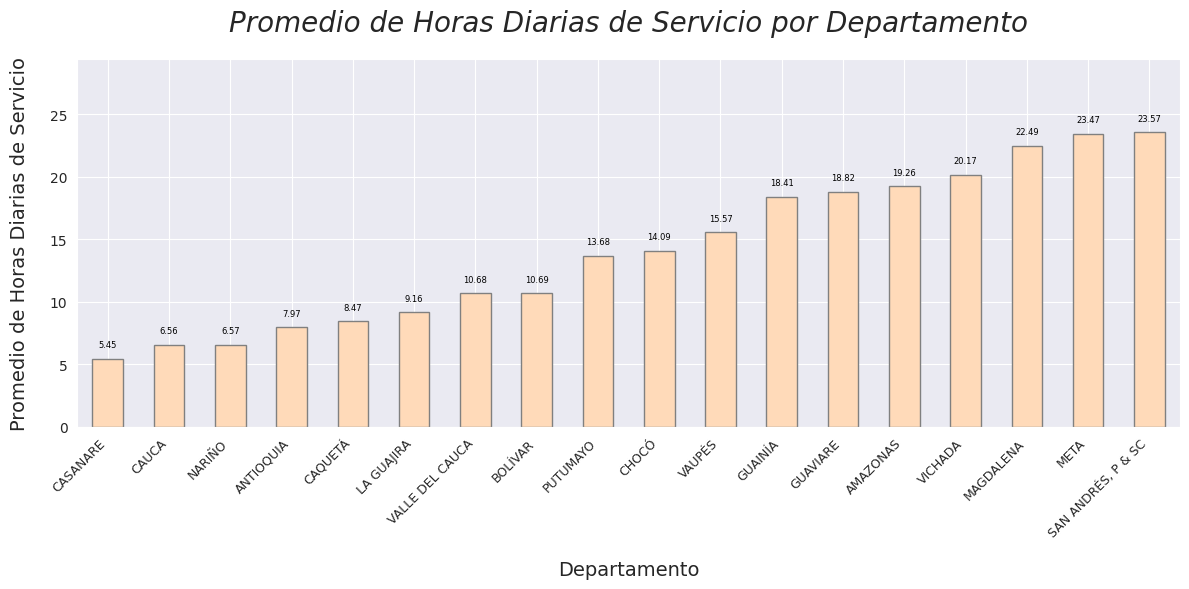

In [41]:
prom_h_departamento = df_ZNI_hprom.groupby(['Departamento'])['hrs/dia_servicio'].mean()

#plt.rcParams['font.family'] = 'sans-serif' # Puedes probar 'serif', 'monospace', 'fantasy', 'cursive'

sns.set_style("darkgrid")
prom_h_departamento.sort_values(ascending=True, inplace=True)

# Crea el gráfico de barras
ax =prom_h_departamento.plot(
    kind='bar',
    figsize=(12, 6),  # Ajusta el tamaño para mejor visualización
    color='peachpuff',  # Cambia el color de las barras
    edgecolor='grey' # Añade un borde a las barras
)

# Añade un título descriptivo
ax.set_title(
    'Promedio de Horas Diarias de Servicio por Departamento',
    fontsize=20,
    style= 'oblique',
    pad=20  # Espacio entre el título y el gráfico
)

# Etiquetas para los ejes
ax.set_xlabel(
    'Departamento',
    fontsize=14,
    labelpad=15 # Espacio entre la etiqueta y el eje
)
ax.set_ylabel(
    'Promedio de Horas Diarias de Servicio',
    fontsize=14,
    labelpad=15
)

# Mejora las etiquetas del eje X para que no se superpongan
plt.xticks(
    rotation=45,  # Rota las etiquetas para mejor legibilidad
    ha='right',   # Alinea el texto a la derecha
    fontsize=9
)

# Ajusta las etiquetas del eje Y
plt.yticks(fontsize=10)

ax.set_ylim(0, prom_h_departamento.max() * 1.25)

# Muestra el valor exacto encima de cada barra
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Formatea a dos decimales
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),  # Desplaza el texto 10 puntos hacia arriba
        textcoords='offset points',
        fontsize=6,
        color='black'
    )

# Asegura que todos los elementos se ajusten dentro de la figura
plt.tight_layout()

# Muestra el gráfico
plt.show()

### **Gráfico prom. horas diarias de servicio y número de municipios NI por departamento**

### **Corrección Datos de Energía (Energía Activa y Reactiva)**

In [42]:
df_ZNI.head(2)

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
0,AMAZONAS,LETICIA,91001000,2024,6,3994102,1010671.0,7824.51,24.0
1,AMAZONAS,PUERTO NARIÑO,91540000,2024,6,127838,40378.0,256.00,24.0


In [43]:
df_ZNI[['energ_act', 'energ_react']].isna().sum() #Verificar si hay datos NAN

,0
energ_act,0
energ_react,0


In [44]:
df_ZNI[(df_ZNI['energ_act']<=0)&(df_ZNI['energ_react']<=0)] #Verificar que no hay datos negativos

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.00,0.0
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.00,0.0
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.00,0.0
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.00,0.0
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.00,0.0
213,NARIÑO,MAGÜÍ,52427913,2024,5,0,0.0,0.00,0.0
214,NARIÑO,MAGÜÍ,52427915,2024,5,0,0.0,0.00,0.0
227,VAUPÉS,CARURÚ,97161000,2024,5,0,0.0,0.00,0.0
241,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753002,2024,1,0,0.0,0.00,0.0
260,CHOCÓ,ACANDÍ,27006003,2024,1,0,0.0,0.00,0.0


In [45]:
df_ZNI[['energ_act', 'energ_react']].describe()
#Count = Cuantos datos validos hay en cada columna
#Mean = La media promedio de la columna
#std = desviacion estandar con respecto a la media
#min = valor minimo
#max = valor maximo
#25% = El 25% de los datos esta por debajo de ese valor
#50% = La mediana, el punto medio
#75% = El 75% de los datos esta por debajo de este valor

,energ_act,energ_react
count,4.591000e+03,4.591000e+03
mean,3.692386e+05,1.085336e+05
std,1.812247e+06,4.896188e+05
min,0.000000e+00,0.000000e+00
25%,4.950500e+03,1.984000e+03
50%,1.229200e+04,4.962000e+03
75%,8.346300e+04,2.987500e+04
max,2.062092e+07,5.435213e+06


In [46]:
import numpy as np
df_ZNI['FP'] = df_ZNI['energ_act'] / np.sqrt((df_ZNI['energ_act'])**2 + (df_ZNI['energ_react'])**2)





In [47]:
# Se buscan los registros de apagones, en los cuales la FP resulta en una indeterminación 0/0
df_ZNI[(df_ZNI['energ_act'] == 0.0)].head()


,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.0,0.0,NaN
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.0,0.0,NaN
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.0,0.0,NaN
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.0,0.0,NaN
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.0,0.0,NaN


In [48]:
# Se buscan los registros de apagones an nariño, es decir,  donde la energía activa es 0.0
df_ZNI[(df_ZNI['energ_act'] == 0.0)].head()


,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.0,0.0,NaN
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.0,0.0,NaN
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.0,0.0,NaN
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.0,0.0,NaN
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.0,0.0,NaN


In [49]:
# Rellena los NaN de la columna FP del dataframe df_ZNI con ceros
df_ZNI['FP'].fillna(0, inplace=True)
df_ZNI[(df_ZNI['energ_act'] == 0.0)].head()

/tmp/ipython-input-1181160691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ZNI['FP'].fillna(0, inplace=True)


,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
58,NARIÑO,MAGÜÍ,52427913,2024,6,0,0.0,0.0,0.0,0.0
59,NARIÑO,MAGÜÍ,52427915,2024,6,0,0.0,0.0,0.0,0.0
142,NARIÑO,MAGÜÍ,52427913,2024,7,0,0.0,0.0,0.0,0.0
143,NARIÑO,MAGÜÍ,52427915,2024,7,0,0.0,0.0,0.0,0.0
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.0,0.0,0.0



**FUNCIÓN QUE GRAFICA DEPARTAMENTO Y ENERGIA (POTENCIA BASE, ENERGIA ACTIVA O ENERGIA REACTIVA) -> SIMÓN**


In [50]:
df_ZNI['Departamento'].unique()

array(['AMAZONAS', 'SAN ANDRÉS, P & SC', 'BOLÍVAR', 'CAQUETÁ', 'CAUCA',
       'CHOCÓ', 'GUAINÍA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'PUTUMAYO', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA', 'ANTIOQUIA',
       'GUAVIARE', 'CASANARE'], dtype=object)

### **Corrección Datos de Potencia (Potencia Máxima)**

In [51]:
# en df_ZNI buscar los registros del departamento CHOCÓ que tengan energía activa 0.0
df_ZNI[(df_ZNI['energ_act'] == 0.0) & (df_ZNI['Departamento'] == 'CHOCÓ')].head()

,Departamento,Municipio,Localidad,Año,Mes,energ_act,energ_react,potencia_max,hrs/dia_servicio,FP
197,CHOCÓ,QUIBDÓ,27001029,2024,5,0,0.0,0.00,0.0,0.0
260,CHOCÓ,ACANDÍ,27006003,2024,1,0,0.0,0.00,0.0,0.0
279,CHOCÓ,MEDIO ATRATO (BETÉ),27425008,2024,1,0,0.0,0.17,0.0,0.0
356,CHOCÓ,MEDIO ATRATO (BETÉ),27425008,2024,2,0,0.0,0.00,0.0,0.0
551,CHOCÓ,MEDIO ATRATO (BETÉ),27425008,2023,12,0,0.0,0.00,0.0,0.0


# **ANALISIS**

## **Análisis del panorama de las ZNI a nivel nacional**
...

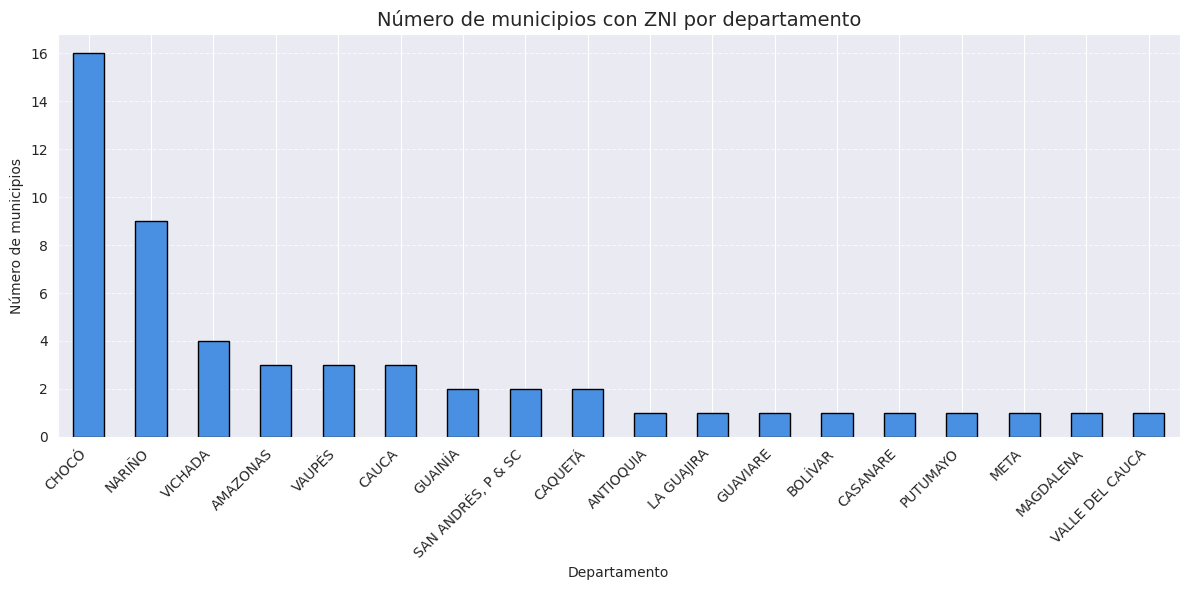

In [52]:
# gráfica para saber cuantos municipios con ZNI hay en cada departamento

# Agrupar por departamento y contar municipios únicos
conteo_municipios = df_ZNI.groupby("Departamento")["Municipio"].nunique().sort_values(ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
conteo_municipios.plot(kind="bar", color="#4a90e2", edgecolor="black")

# Títulos y etiquetas
plt.title("Número de municipios con ZNI por departamento", fontsize=14)
plt.xlabel("Departamento")
plt.ylabel("Número de municipios")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


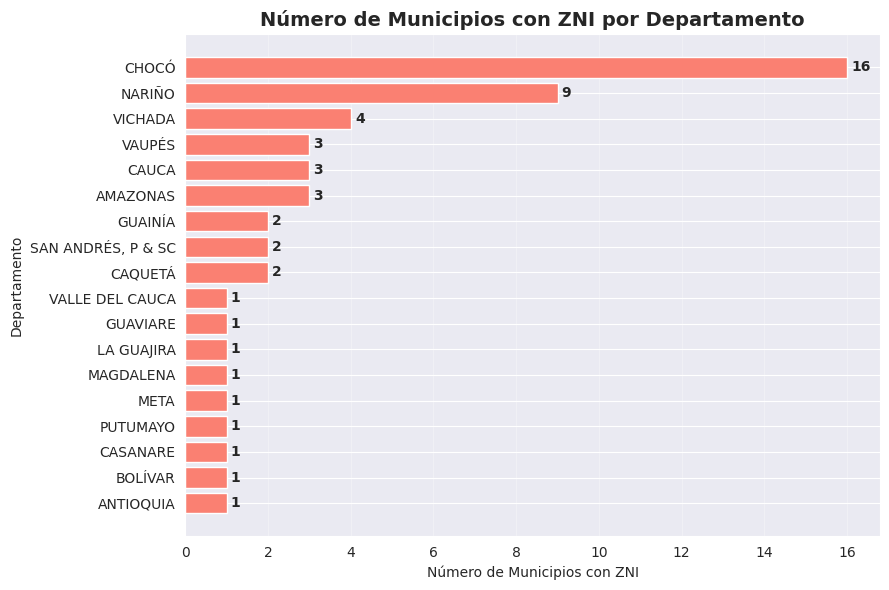

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar municipios únicos por departamento
municipios_por_depto = df_ZNI.groupby('Departamento')['Municipio'].nunique().sort_values(ascending=True)

plt.figure(figsize=(9, 6))
bars = plt.barh(range(len(municipios_por_depto)), municipios_por_depto.values, color='salmon')
plt.title('Número de Municipios con ZNI por Departamento', fontsize=14, fontweight='bold')
plt.yticks(range(len(municipios_por_depto)), municipios_por_depto.index)
plt.xlabel('Número de Municipios con ZNI')
plt.ylabel('Departamento')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center', fontweight='bold')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

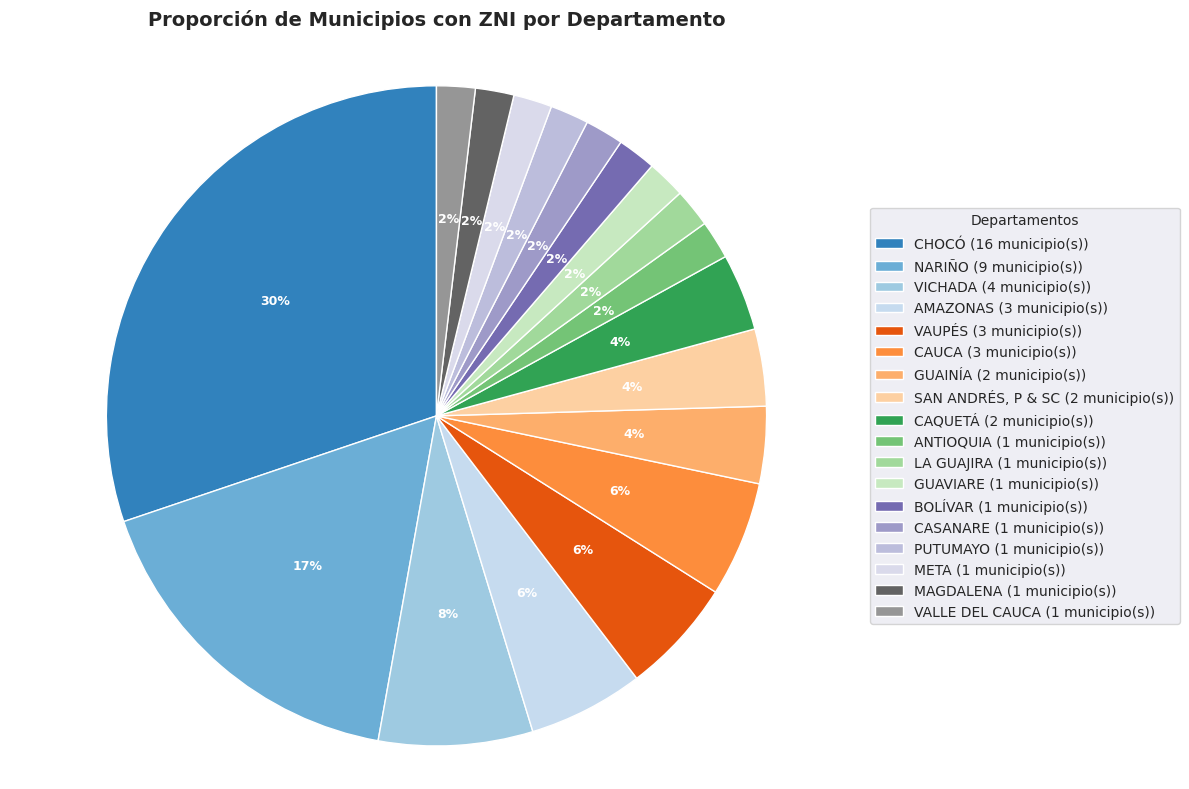

Distribución de Municipios con ZNI por Departamento:
                    Municipios  Porcentaje
Departamento                              
CHOCÓ                       16        30.2
NARIÑO                       9        17.0
VICHADA                      4         7.5
AMAZONAS                     3         5.7
VAUPÉS                       3         5.7
CAUCA                        3         5.7
GUAINÍA                      2         3.8
SAN ANDRÉS, P & SC           2         3.8
CAQUETÁ                      2         3.8
ANTIOQUIA                    1         1.9
LA GUAJIRA                   1         1.9
GUAVIARE                     1         1.9
BOLÍVAR                      1         1.9
CASANARE                     1         1.9
PUTUMAYO                     1         1.9
META                         1         1.9
MAGDALENA                    1         1.9
VALLE DEL CAUCA              1         1.9


In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar municipios únicos por departamento
municipios_por_depto = df_ZNI.groupby('Departamento')['Municipio'].nunique().sort_values(ascending=False)

# Crear la gráfica de tarta
plt.figure(figsize=(12, 8))

# Crear colores automáticamente en escala de rojos

colors = plt.cm.tab20c(range(len(municipios_por_depto)))

# Crear el gráfico de tarta
wedges, texts, autotexts = plt.pie(municipios_por_depto.values,
                                   #labels=municipios_por_depto.index,
                                   autopct='%1.0f%%',
                                   startangle=90,
                                   colors=colors,
                                   textprops={'fontsize': 10})

# Configurar título
plt.title('Proporción de Municipios con ZNI por Departamento',
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la apariencia de los porcentajes dentro del gráfico
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Posicionar la leyenda al lado
plt.legend(wedges, [f'{dept} ({count} municipio(s))' for dept, count in municipios_por_depto.items()],
           title="Departamentos",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')

plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Mostrar también los datos en formato tabla con porcentajes
total_municipios = municipios_por_depto.sum()
porcentajes = (municipios_por_depto / total_municipios * 100).round(1)

print("Distribución de Municipios con ZNI por Departamento:")
resultado = pd.DataFrame({
    'Municipios': municipios_por_depto.values,
    'Porcentaje': porcentajes.values
})
resultado.index = municipios_por_depto.index
print(resultado)

In [55]:
df_ZNI['Municipio'].nunique() #Para saber el número de municipios con ZNI en el país

53

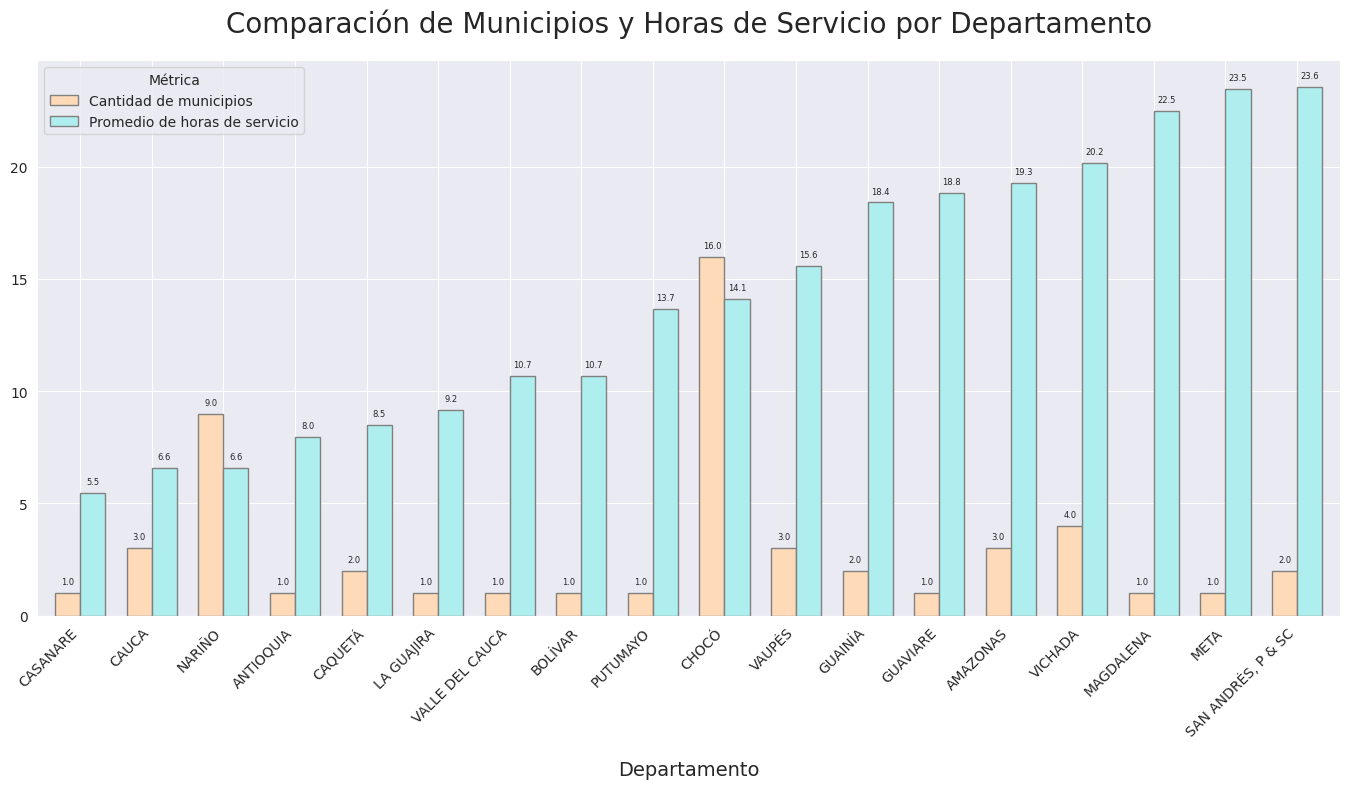

In [56]:
#  1: Obtener el conteo total de municipios por departamento
conteo_municipios = df_ZNI.groupby("Departamento")["Municipio"].nunique().sort_values(ascending=False)
total_municipios = df_ZNI_hprom.groupby('Departamento')['Municipio'].nunique()

# Unir ambos resultados en un solo DataFrame
df_comparacion = pd.DataFrame({
    'Cantidad de municipios': conteo_municipios,
    'Promedio de horas de servicio': prom_h_departamento
})

df_comparacion.sort_values(by='Promedio de horas de servicio', ascending=True, inplace=True)

#  2: Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(17, 8))

df_comparacion.plot(
    kind='bar',
    ax=ax,
    width=0.7,
    color=['peachpuff', 'paleturquoise'],
    edgecolor='grey')

#  3: Personalizar el gráfico
ax.set_title('Comparación de Municipios y Horas de Servicio por Departamento', fontsize=20, pad=20)
ax.set_xlabel('Departamento', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

ax.legend(title='Métrica', loc='upper left')

# Anotar los valores sobre cada barra
for p in ax.patches:
    valor = p.get_height()
    if valor > 0: # Solo anota si el valor no es 0
        ax.annotate(
            f'{valor:.1f}', # decimales
            xy=(p.get_x() + p.get_width() / 2, valor),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=6
        )
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show();

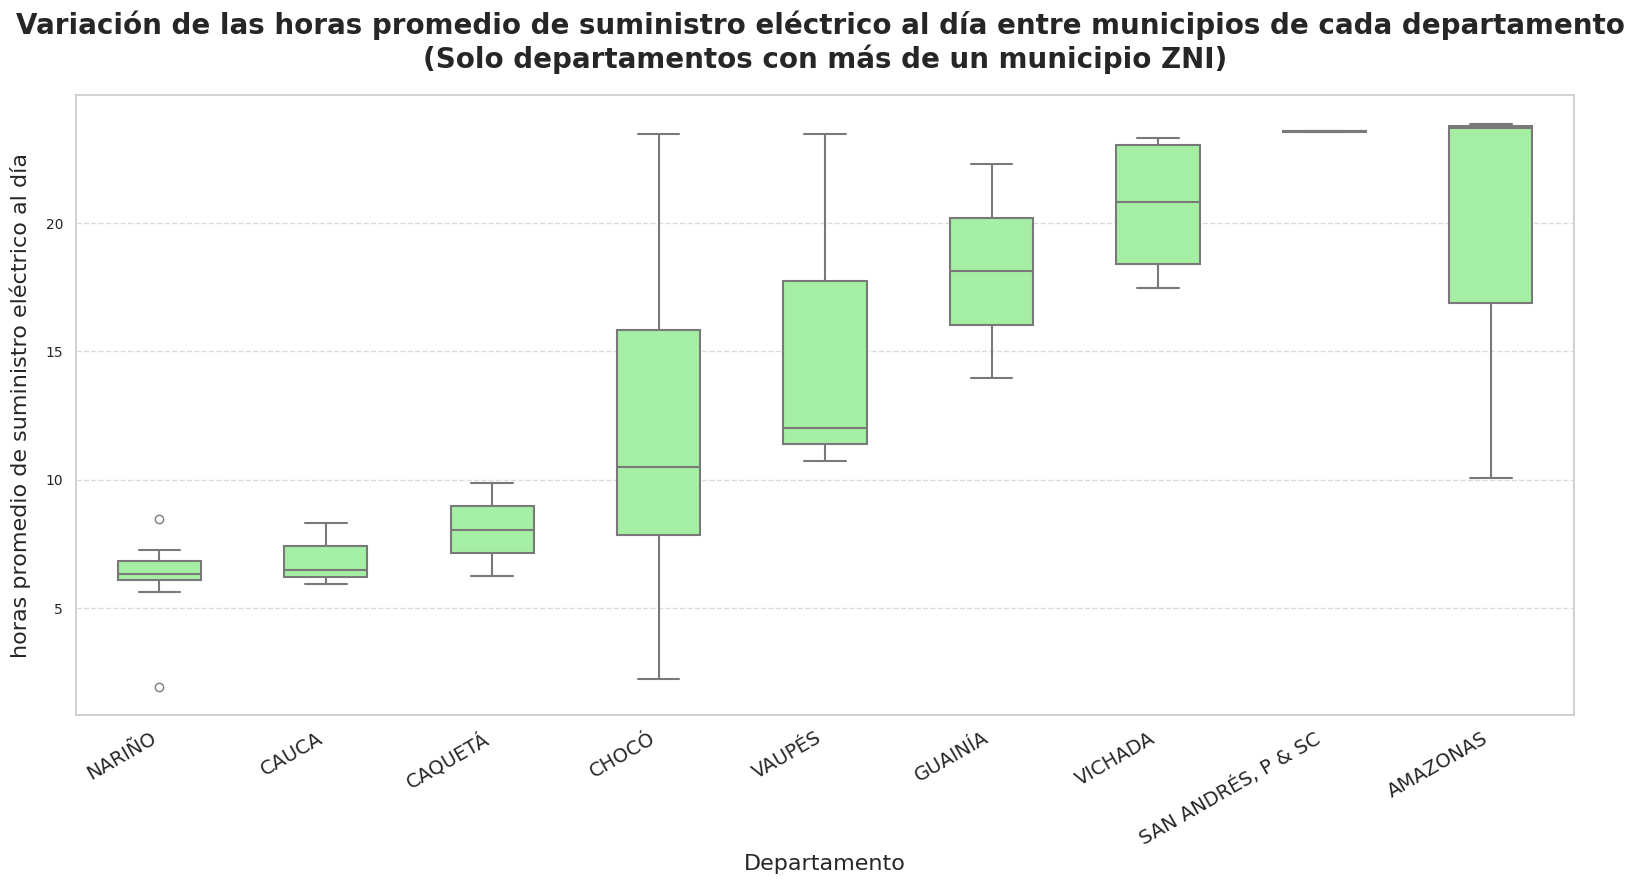

In [57]:
# Variable energética a analizar

variable_energetica = 'hrs/dia_servicio'  # o 'PB', etc.
nombre_variable = 'horas promedio de suministro eléctrico al día'

media_por_municipio = df_ZNI.groupby(['Departamento', 'Municipio'])[variable_energetica].mean().reset_index(name='Media_Municipio')

municipios_por_dpto = media_por_municipio.groupby('Departamento')['Municipio'].nunique()
departamentos_validos = municipios_por_dpto[municipios_por_dpto > 1].index
media_filtrada = media_por_municipio[media_por_municipio['Departamento'].isin(departamentos_validos)]

orden_dptos = media_filtrada.groupby('Departamento')['Media_Municipio'].median().sort_values().index

plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

sns.boxplot(
    data=media_filtrada,
    x='Departamento',
    y='Media_Municipio',
    order=orden_dptos,        # Orden por mediana
    color = 'palegreen',
    width=0.5,                # Reduce ancho de las cajas
    linewidth=1.5 )              # Grosor del borde

plt.title(
    f'Variación de las {nombre_variable} entre municipios de cada departamento \n(Solo departamentos con más de un municipio ZNI)',
    fontsize=20,
    pad=20,
    fontweight='bold')
plt.xlabel('Departamento', fontsize=16)
plt.ylabel(f'{nombre_variable}', fontsize=16, labelpad=10)
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas horizontales sutiles
plt.tight_layout()
plt.show()


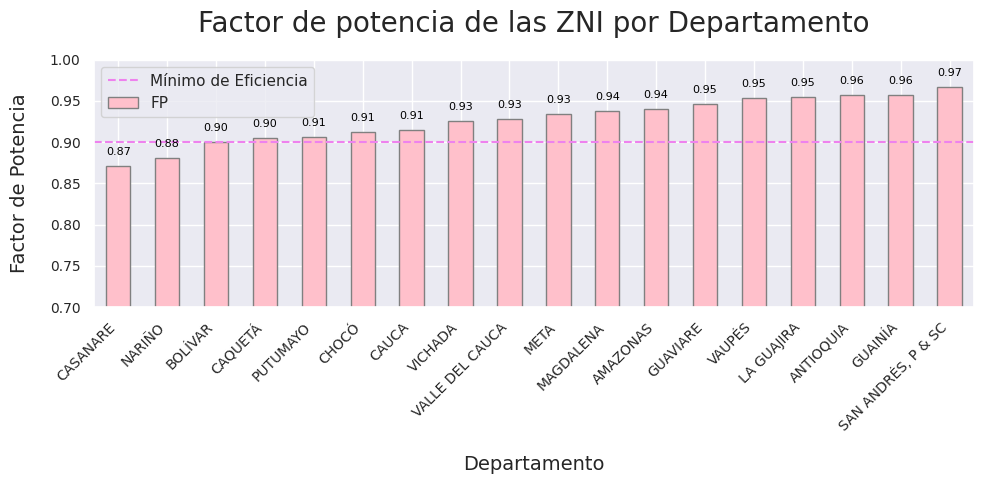

In [58]:
# Probar factor de potencia por departamento

prom_PB_departamento = df_ZNI.groupby(['Departamento'])['FP'].mean()
prom_PB_departamento = prom_PB_departamento.sort_values(ascending=True)

sns.set_style("darkgrid")
ax =prom_PB_departamento.plot(
    kind='bar',
    figsize=(10, 5),  # Ajusta el tamaño para mejor visualización
    color='pink',  # Cambia el color de las barras
    edgecolor='grey')

ax.set_title('Factor de potencia de las ZNI por Departamento', fontsize=20, pad=20 )

ax.set_xlabel('Departamento', fontsize=14, labelpad=15 )
ax.set_ylabel('Factor de Potencia', fontsize=14, labelpad=15)
plt.xticks(
    rotation=45,  # Rota las etiquetas para mejor legibilidad
    ha='right',   # Alinea el texto a la derecha
    fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(0.7, 1)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Formatea a dos decimales
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),  # Desplaza el texto 10 puntos hacia arriba
        textcoords='offset points',
        fontsize=8,
        color='black'    )
plt.tight_layout()
plt.axhline(y=0.9, color='violet', linestyle='--', label='Mínimo de Eficiencia')
plt.legend()
plt.show()

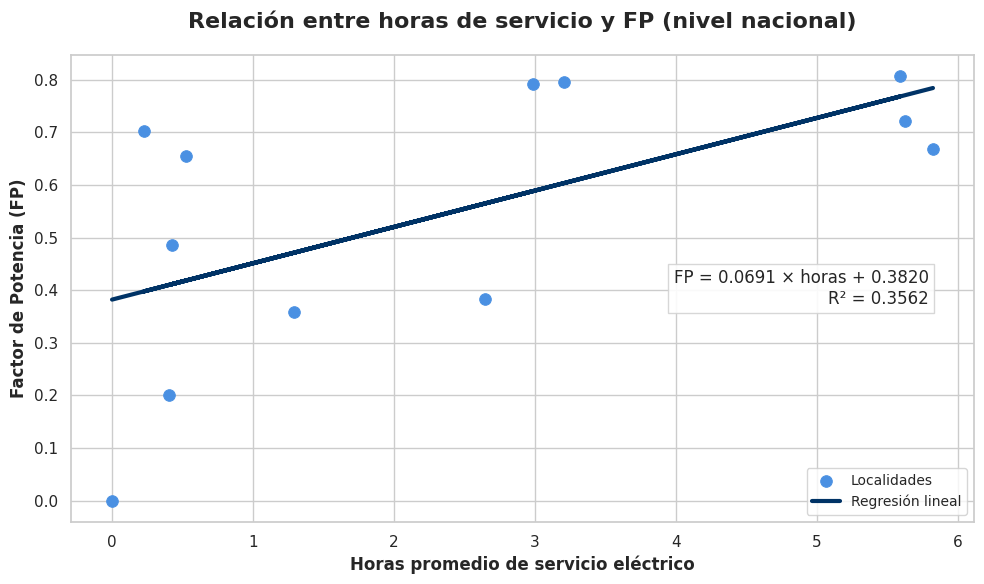

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def regresion_fp_vs_horas(df, fp_min=0, fp_max=1, hrs_min=0, hrs_max=24):
    df_medias = df.groupby(['Municipio', 'Localidad'])[['FP', 'hrs/dia_servicio']].mean().reset_index()
    datos = df_medias[
        df_medias['FP'].between(fp_min, fp_max) & df_medias['hrs/dia_servicio'].between(hrs_min, hrs_max)]
    X = datos[['hrs/dia_servicio']].values
    y = datos['FP'].values
    modelo = LinearRegression().fit(X, y)
    y_pred = modelo.predict(X)
    r2 = r2_score(y, y_pred)

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='hrs/dia_servicio', y='FP', data=datos, color='#4A90E2', s=70, edgecolor=None, label='Localidades')
    plt.plot(datos['hrs/dia_servicio'], y_pred, color='#003366', linewidth=3, label='Regresión lineal')
    plt.title('Relación entre horas de servicio y FP (nivel nacional)', fontsize=16, weight='bold', pad=20)
    plt.xlabel('Horas promedio de servicio eléctrico', fontsize=12, weight='bold')
    plt.ylabel('Factor de Potencia (FP)', fontsize=12, weight='bold')
    plt.legend(loc='lower right', fontsize=10, frameon=True)
    plt.text(0.95, 0.5,
             f'FP = {modelo.coef_[0]:.4f} × horas + {modelo.intercept_:.4f}\nR² = {r2:.4f}',
             transform=plt.gca().transAxes, fontsize=12,
             ha='right', va='center',
             bbox=dict(facecolor='white', edgecolor='lightgray', alpha=0.9))
    plt.tight_layout()
    plt.show()

regresion_fp_vs_horas(df_ZNI, fp_min=0, fp_max=0.85, hrs_min=0, hrs_max=6)




#### **Análisis municipal del chocó**

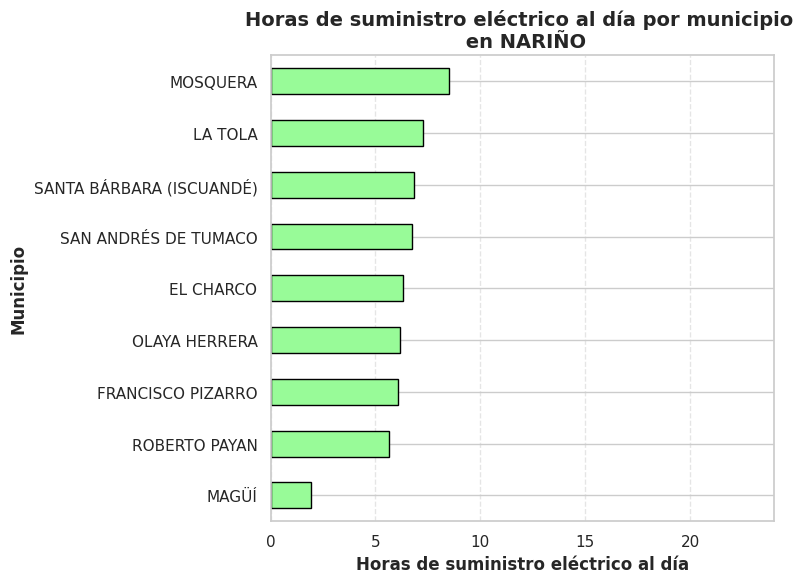

In [60]:
def graficar_municipios_por_variable(df, departamento, variable):
    nombres_legibles = {
        'energ_act': 'Energía activa',
        'energ_react': 'Energía reactiva',
        'potencia_max': 'Potencia máxima',
        'hrs/dia_servicio': 'Horas de suministro eléctrico al día',
        'FP': 'Factor de potencia'}

    datos = df[df['Departamento'] == departamento]
    medias = datos.groupby('Municipio')[variable].mean().sort_values()
    plt.figure(figsize=(8, 6))
    medias.plot(kind='barh', color='palegreen', edgecolor='black')

    plt.title(f"{nombres_legibles.get(variable, variable)} por municipio \n en {departamento}", fontsize=14, loc='center', weight='bold' )
    plt.xlabel(nombres_legibles.get(variable, variable), fontweight='bold')
    plt.ylabel('Municipio', fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.xlim(0,24)
    #plt.axvline(x=0.9, color='cyan', linestyle='--', label='Mínimo de Eficiencia')
    plt.show()

graficar_municipios_por_variable(df_ZNI, 'NARIÑO', 'hrs/dia_servicio')

## **Estacionalidad en demanda máxima (Potencia Máxima)**

* ¿En qué meses tiende a darse la mayor `POTENCIA MÁXIMA`?
* ¿Se repite un patrón entre departamentos, localidades o municipios?
* ¿Existen meses críticos por alta demanda?

🔎 Agrupa por `MES SERVICIO` y analiza la variación de la `POTENCIA MÁXIMA`. Puedes usar diagramas de violín, boxplots o líneas.


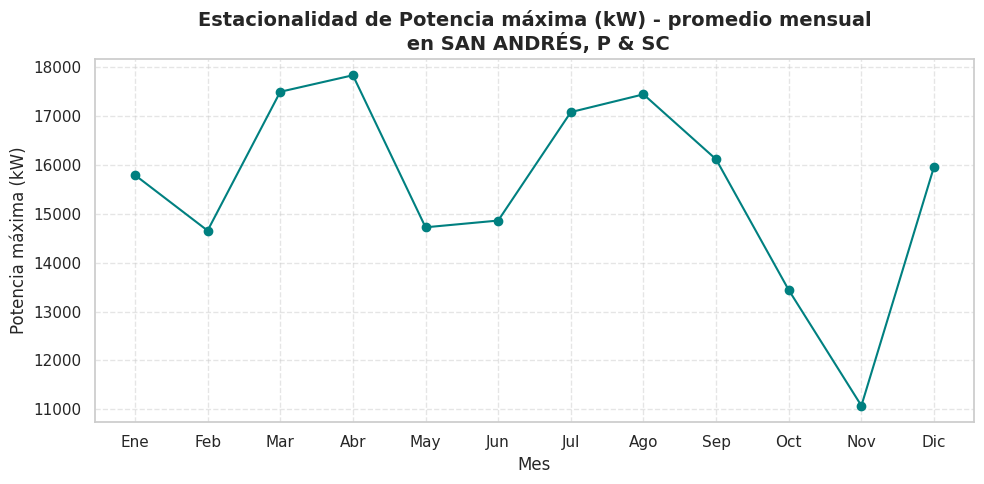

In [61]:
import matplotlib.pyplot as plt

def grafica_estacionalidad(df, parametro, departamento=None):
    df_filtrado = df.copy()
    if departamento:
        df_filtrado = df_filtrado[df_filtrado['Departamento'] == departamento]

    nombres = {
        'energ_act': 'Energía activa (kWh)',
        'energ_react': 'Energía reactiva (kVArh)',
        'potencia_max': 'Potencia máxima (kW)',
        'hrs/dia_servicio': 'Horas de suministro eléctrico al día',
        'FP': 'Factor de potencia'}

    df_mes = df_filtrado.groupby('Mes')[parametro].mean()

    meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    x = df_mes.index
    y = df_mes.values

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='teal')
    plt.xticks(ticks=range(1, 13), labels=meses)
    plt.title(f'Estacionalidad de {nombres[parametro]} - promedio mensual' + (f'\n en {departamento}' if departamento else ''), fontsize=14, weight='bold')
    plt.xlabel('Mes')
    plt.ylabel(nombres[parametro])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.ylim()
    plt.show()

# Ejemplo
grafica_estacionalidad(df_ZNI, parametro='potencia_max', departamento='SAN ANDRÉS, P & SC')



In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def grafica_estacionalidad(
    df,
    parametro='potencia_max',
    departamento=None,
    municipio=None,
    tipo_grafica='line'
):

    if parametro not in df.columns:
        raise ValueError(f"❌ El parámetro '{parametro}' no existe en el DataFrame.")

    # Copia del DataFrame y filtrado
    df_filtrado = df.copy()
    if departamento:
        df_filtrado = df_filtrado[df_filtrado['Departamento'] == departamento]
    if municipio:
        df_filtrado = df_filtrado[df_filtrado['Municipio'] == municipio]

    if df_filtrado.empty:
        print("⚠️ No hay datos para los filtros aplicados.")
        return

    # Nombres más legibles
    nombres = {
        'energ_act': 'Energía activa (kWh)',
        'potencia_max': 'Potencia máxima (kW)'
    }

    # Título personalizado
    titulo = f'Estacionalidad de {nombres.get(parametro, parametro)}'
    if departamento: titulo += f' - {departamento}'
    if municipio: titulo += f' / {municipio}'

    # Crear figura
    plt.figure(figsize=(12, 6))

    # Gráfico de líneas con desviación estándar
    if tipo_grafica == 'line':
        df_mes = df_filtrado.groupby('Mes')[parametro].agg(['mean', 'std']).reset_index()
        plt.plot(df_mes['Mes'], df_mes['mean'], marker='o', color='teal', label='Promedio')
        plt.fill_between(df_mes['Mes'],
                         df_mes['mean'] - df_mes['std'],
                         df_mes['mean'] + df_mes['std'],
                         alpha=0.2, label='±1 Desv. Est.')

    # Boxplot por mes
    elif tipo_grafica == 'box':
        sns.boxplot(data=df_filtrado, x='Mes', y=parametro, palette='coolwarm')

    # Violinplot por mes
    elif tipo_grafica == 'violin':
        sns.violinplot(
            data=df_filtrado,
            x='Mes',
            y=parametro,
            hue='Mes',
            palette='viridis',
            legend=False
        )

    # Personalizar ejes
    meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    plt.xticks(ticks=range(1, 13), labels=meses)
    plt.title(titulo, fontsize=14, weight='bold')
    plt.xlabel('Mes del servicio')
    plt.ylabel(nombres.get(parametro, parametro))
    plt.grid(True, linestyle='--', alpha=0.4)
    if tipo_grafica == 'line':
        plt.legend()
    plt.tight_layout()
    plt.show()



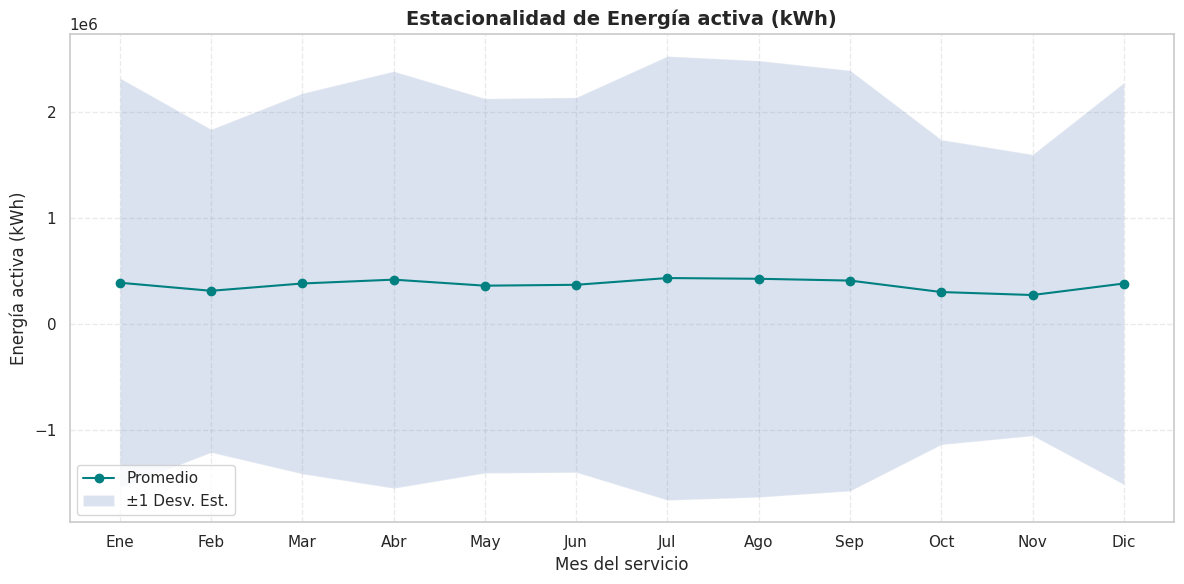

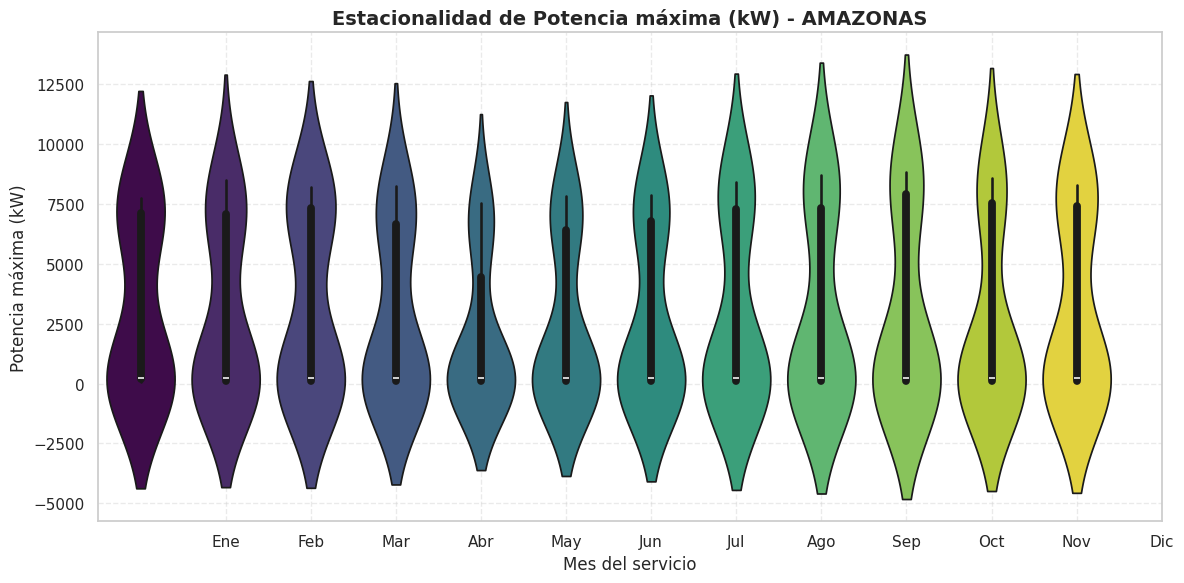

/tmp/ipython-input-216210677.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='Mes', y=parametro, palette='coolwarm')


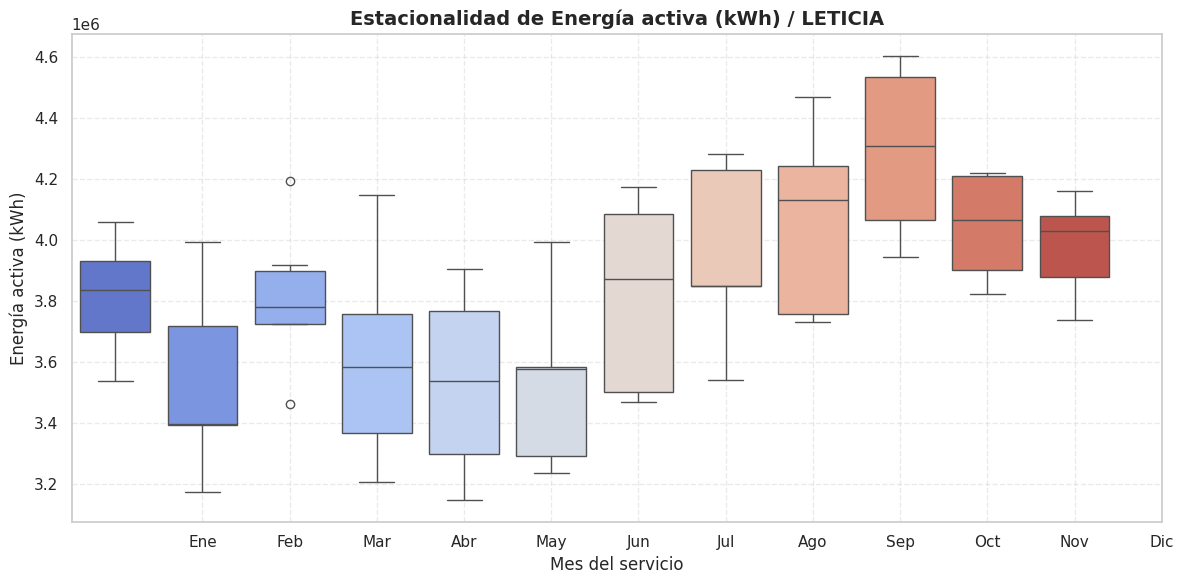

In [75]:
# Energía activa en todo el país (línea)
grafica_estacionalidad(df_ZNI, parametro='energ_act', tipo_grafica='line')

# Potencia máxima en AMAZONAS (violín)
grafica_estacionalidad(df_ZNI, parametro='potencia_max', departamento='AMAZONAS', tipo_grafica='violin')

# Energía activa en LETICIA (boxplot)
grafica_estacionalidad(df_ZNI, parametro='energ_act', municipio='LETICIA', tipo_grafica='box')

## **Evaluación de la Calidad y Eficiencia (2020-2024)**


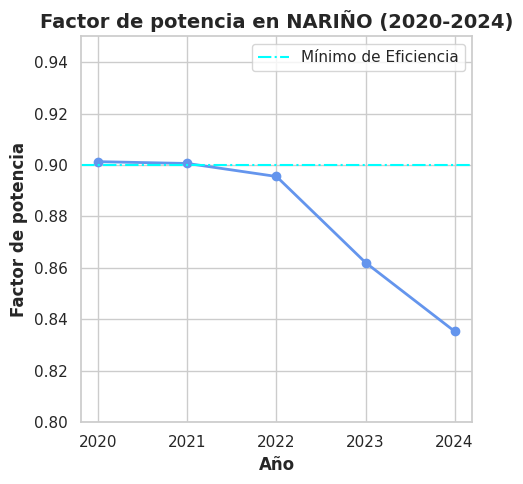

In [62]:
def graficar_tiempo_dpto(departamento, variable):
    if variable not in ["energ_act", "energ_react", "FP"]:
        raise ValueError("La variable debe ser 'energ_act', 'energ_react' o 'FP'")

    df_filtrado = df_ZNI[df_ZNI["Departamento"] == departamento]

    # Filtrar años entre 2020 y 2024
    df_filtrado = df_filtrado[df_filtrado['Año'].between(2020, 2024)]
    df_agrupado = df_filtrado.groupby("Año")[variable].mean().reset_index()
    plt.figure(figsize=(5, 5))
    plt.plot(df_agrupado["Año"], df_agrupado[variable], marker='o', linestyle='-', color='cornflowerblue', linewidth=2)

    # usa un diccionario que le cambie el valor a FP por Factor de Potencia
    nombres_legibles = {
        'energ_act': 'Energía activa',
        'energ_react': 'Energía reactiva',
        'potencia_max': 'Potencia máxima',
        'hrs/dia_servicio': 'Horas de suministro eléctrico al día',
        'FP': 'Factor de potencia'}

    plt.title(f'{nombres_legibles[variable]} en {departamento} (2020-2024)', fontsize=14, fontweight='bold')
    plt.xlabel('Año', fontweight='bold')
    plt.ylabel(nombres_legibles[variable], fontweight='bold')
    plt.ylim(0.8,0.95)
    plt.grid(True)
    plt.xticks(range(2020, 2025))
    plt.tight_layout()
    plt.axhline(y=0.9, color='cyan', linestyle='-.', label='Mínimo de Eficiencia')
    plt.legend()
    plt.show()

graficar_tiempo_dpto('NARIÑO', 'FP')

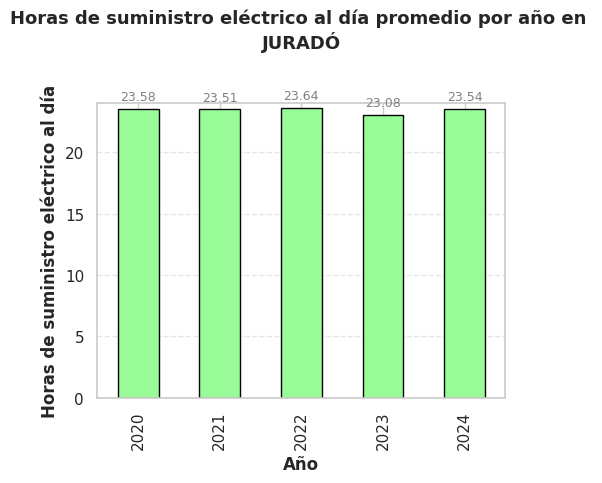

In [63]:
def graficar_variable_en_municipio(df, municipio, variable_cod):
    nombres = {
        'energ_act': 'Energía activa (kWh)',
        'energ_react': 'Energía reactiva (kVArh)',
        'potencia_max': 'Potencia máxima (kW)',
        'hrs/dia_servicio': 'Horas de suministro eléctrico al día',
        'FP': 'Factor de potencia'
    }
    nombre_variable = nombres.get(variable_cod, variable_cod)
    datos = df[df['Municipio'] == municipio]

    if datos.empty:
        print(f"No se encontraron datos para el municipio: {municipio}")
        return

    promedios = datos.groupby("Año")[variable_cod].mean()

    plt.figure(figsize=(5, 5))
    ax = promedios.plot(kind='bar', color='palegreen', edgecolor='black') #a1d0ff ->color para FP

    for i, v in enumerate(promedios):
        ax.text(i, v + 0.03 * max(promedios), f'{v:.2f}', ha='center', fontsize=9, color='gray')

    plt.title(f'{nombre_variable} promedio por año en \n{municipio}', fontsize=13, weight='bold', pad=40)
    plt.xlabel('Año', weight='bold')
    plt.ylabel(nombre_variable, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.axhline(y=0.9, color='cyan', linestyle='--', label='Mínimo de Eficiencia')
    # plt.legend(loc='lower left')
    plt.tight_layout()
    plt.ylim(0,24)
    plt.show(20,24)

graficar_variable_en_municipio(df_ZNI, 'JURADÓ', 'hrs/dia_servicio')

In [64]:
# df_ZNI[df_ZNI['Municipio'] == 'VIGÍA DEL FUERTE']['Localidad'].unique()

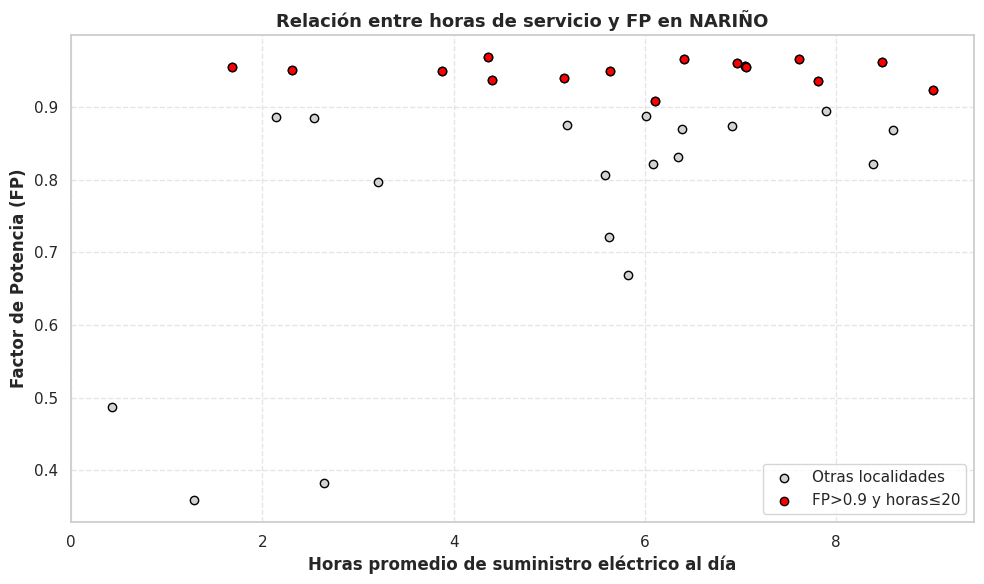

In [65]:
def scatter_fp_vs_horas(df, departamento):
    df_dep = df[df['Departamento'] == departamento].copy()
    df_dep = df_dep.groupby(['Municipio', 'Localidad'])[['FP', 'hrs/dia_servicio']].mean().reset_index()

    # Filtrar puntos destacados
    destacados = df_dep[(df_dep['FP'] > 0.9) & (df_dep['hrs/dia_servicio'] <= 20)]

    plt.figure(figsize=(10, 6))
    plt.scatter(df_dep['hrs/dia_servicio'], df_dep['FP'], color='lightgray', edgecolor='black', label='Otras localidades')
    plt.scatter(destacados['hrs/dia_servicio'], destacados['FP'], color='red', edgecolor='black', label='FP>0.9 y horas≤20')

    # Etiquetas a los puntos destacados
    # for _, row in destacados.iterrows():
    #     plt.text(row['hrs/dia_servicio'] + 0.1, row['FP'], row['Localidad'], fontsize=8)

    plt.title(f'Relación entre horas de servicio y FP en {departamento}', fontsize=13, weight='bold')
    plt.xlabel('Horas promedio de suministro eléctrico al día', weight='bold')
    plt.ylabel('Factor de Potencia (FP)', weight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

scatter_fp_vs_horas(df_ZNI, "NARIÑO")


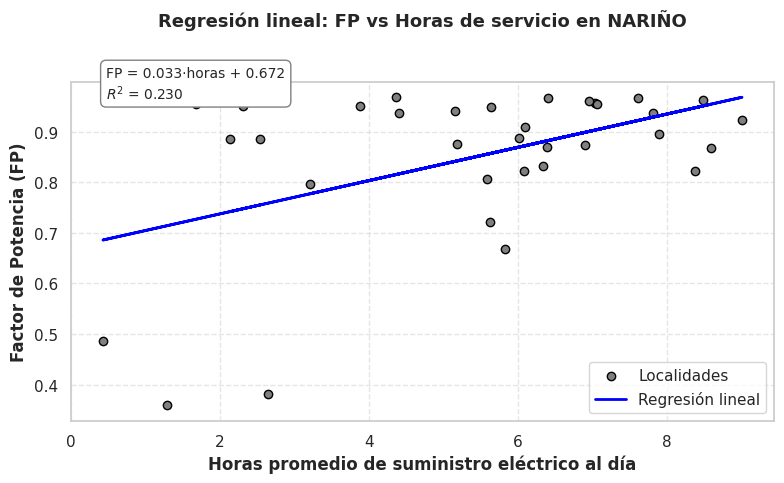

In [66]:
from sklearn.linear_model import LinearRegression

def regresion_fp_vs_horas(df, departamento):
    df_dep = df[df['Departamento'] == departamento].copy()
    df_dep = df_dep.groupby(['Municipio', 'Localidad'])[['FP', 'hrs/dia_servicio']].mean().dropna()

    X = df_dep[['hrs/dia_servicio']].values
    y = df_dep['FP'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = model.score(X, y)

    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='gray', edgecolor='black', label='Localidades')
    plt.plot(X, y_pred, color='blue', linewidth=2, label='Regresión lineal')

    # Ecuación y R² en el gráfico
    m = model.coef_[0]
    b = model.intercept_
    plt.text(0.05, 0.95, f'FP = {m:.3f}·horas + {b:.3f}\n$R^2$ = {r2:.3f}',
             transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='gray'))

    # Estética
    plt.title(f'Regresión lineal: FP vs Horas de servicio en {departamento}', fontsize=13, weight='bold', pad=40)
    plt.xlabel('Horas promedio de suministro eléctrico al día', weight='bold')
    plt.ylabel('Factor de Potencia (FP)', weight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

regresion_fp_vs_horas(df_ZNI, "NARIÑO")


## **Gráficos para la evolución temporal del servicio**

<Figure size 800x800 with 0 Axes>

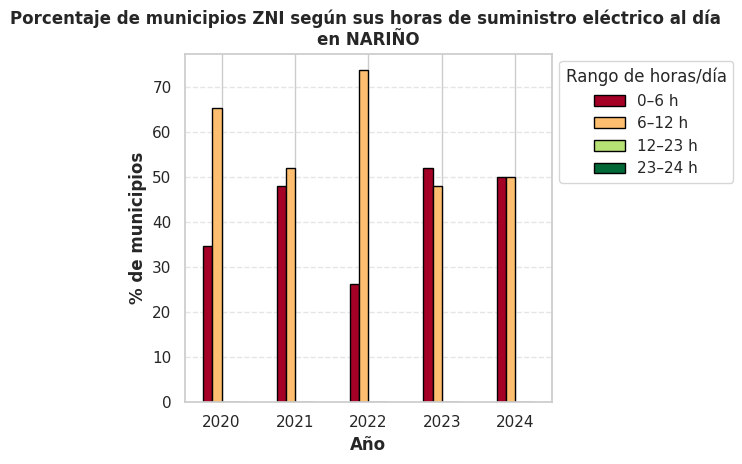

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def grafica_por_rangos_horas(df, departamento=None, paleta='RdYlGn'):
    df_filtrado = df.copy()
    if departamento:
        df_filtrado = df_filtrado[df_filtrado['Departamento'] == departamento]

    # Agrupar por Municipio y Año para evitar múltiples registros por municipio/año
    df_agrupado = df_filtrado.groupby(['Año', 'Localidad'], observed=False)['hrs/dia_servicio'].mean().reset_index()

    # Clasificar en rangos
    bins = [0, 6, 12, 23, 24]
    labels = ['0–6 h', '6–12 h', '12–23 h', '23–24 h']
    df_agrupado['Rango_horas'] = pd.cut(df_agrupado['hrs/dia_servicio'], bins=bins, labels=labels, include_lowest=True)

    # Conteo por año y rango
    conteo = df_agrupado.groupby(['Año', 'Rango_horas'], observed=False).size().unstack().fillna(0)

    porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100

    plt.figure(figsize=(8, 8))
    porcentajes.plot(kind='bar', stacked=False, colormap=paleta, edgecolor='black')

    lugar = f'en {departamento}' if departamento else 'a nivel Nacional'
    plt.title(f'Porcentaje de municipios ZNI según sus horas de suministro eléctrico al día \n{lugar}', fontweight='bold')
    plt.xlabel('Año', fontweight='bold')
    plt.ylabel('% de municipios', fontweight='bold')
    plt.xticks(rotation=0)
    plt.legend(title='Rango de horas/día', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

grafica_por_rangos_horas(df_ZNI, departamento='NARIÑO')  # Solo Chocó



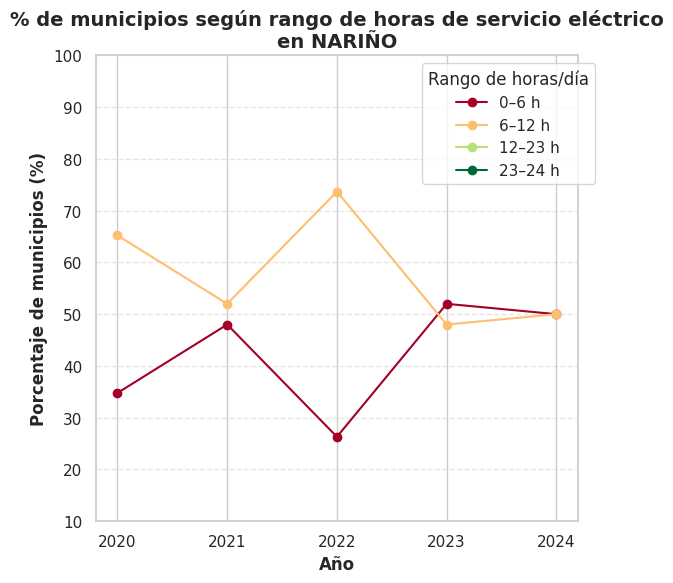

In [68]:
def grafica_lineas_por_rango(df, departamento=None, paleta='RdYlGn'):
    df_filtrado = df.copy()
    if departamento:
        df_filtrado = df_filtrado[df_filtrado['Departamento'] == departamento]

    df_agrupado = df_filtrado.groupby(['Año', 'Localidad'], observed=False)['hrs/dia_servicio'].mean().reset_index()

    # Clasificar en rangos
    bins = [0, 6, 12, 23, 24]
    labels = ['0–6 h', '6–12 h', '12–23 h', '23–24 h']
    df_agrupado['Rango_horas'] = pd.cut(df_agrupado['hrs/dia_servicio'], bins=bins, labels=labels, include_lowest=True)
    conteo = df_agrupado.groupby(['Año', 'Rango_horas'], observed=False).size().unstack().fillna(0)
    porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100
    plt.figure(figsize=(6, 6))
    cmap = plt.get_cmap(paleta)
    colores = [cmap(i / (len(porcentajes.columns) - 1)) for i in range(len(porcentajes.columns))]
    for i, rango in enumerate(porcentajes.columns):
        plt.plot(porcentajes.index, porcentajes[rango], marker='o', label=rango, color=colores[i])

    lugar = f'en {departamento}' if departamento else 'a nivel Nacional'
    plt.title(f'% de municipios según rango de horas de servicio eléctrico\n{lugar}', fontweight='bold', fontsize=14)
    plt.xlabel('Año', fontweight='bold')
    plt.ylabel('Porcentaje de municipios (%)', fontweight='bold')
    plt.xticks(porcentajes.index)
    plt.ylim(10, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title='Rango de horas/día', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

grafica_lineas_por_rango(df_ZNI, departamento='NARIÑO')

In [69]:
 #Este gráfico se comentó ya que no aportaba una tendencia relevante al análisis, y aportaba poca información de las variables en cuestión


# import seaborn as sns

# def histograma_horas_servicio_superpuesto(df, lugar=None):
#     # Filtrar lugar si se proporciona
#     if lugar:
#         df_filtrado = df[df["Departamento"].str.upper() == lugar.upper()]
#         if df_filtrado.empty:
#             df_filtrado = df[df["Municipio"].str.upper() == lugar.upper()]
#     else:
#         df_filtrado = df.copy()

#     años = sorted(df_filtrado["Año"].dropna().unique())
#     palette = sns.color_palette("Purples", n_colors=len(años))

#     plt.figure(figsize=(12, 6))

#     # Histograma para cada año
#     for i, año in enumerate(años):
#         data_año = df_filtrado[df_filtrado["Año"] == año]["hrs/dia_servicio"]
#         plt.hist(data_año, bins=np.arange(0, 25, 1), alpha=0.5, color=palette[i],
#                  label=str(año), edgecolor='black')

#     lugar_texto = f"en {lugar.title()}" if lugar else "a nivel nacional"
#     plt.title(f"Distribución de horas diarias de servicio {lugar_texto}", fontsize=14, fontweight='bold')
#     plt.xlabel("Horas de servicio diario", fontsize=12)
#     plt.ylabel("Frecuencia", fontsize=12)
#     plt.legend(title="Año")
#     plt.grid(axis='y', linestyle='--', alpha=0.5)
#     plt.tight_layout()
#     plt.show()
# histograma_horas_servicio_superpuesto(df_ZNI)

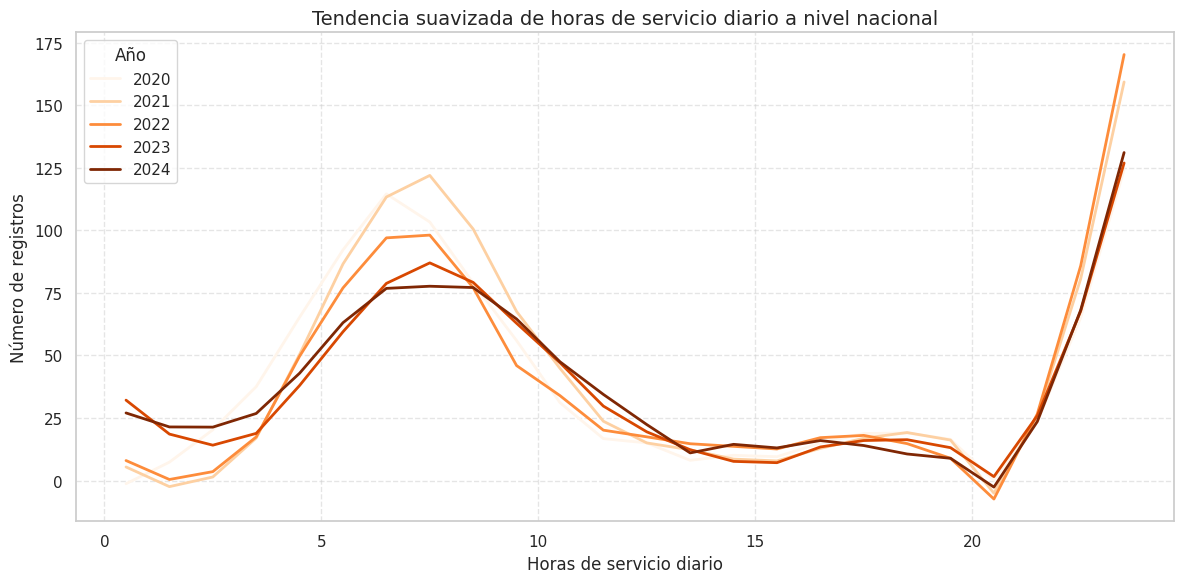

In [70]:
from scipy.signal import savgol_filter

def tendencia_horas_servicio_suavizada(df, lugar=None, bin_width=1, window_length=7, polyorder=2):
    # Filtrar por lugar si se especifica
    if lugar:
        df_filtrado = df[df["Departamento"].str.upper() == lugar.upper()]
        if df_filtrado.empty:
            df_filtrado = df[df["Municipio"].str.upper() == lugar.upper()]
    else:
        df_filtrado = df.copy()

    # Eliminar datos nulos o negativos
    df_filtrado = df_filtrado[df_filtrado["hrs/dia_servicio"] >= 0]

    # Crear bins
    max_horas = df_filtrado["hrs/dia_servicio"].max()
    bins = np.arange(0, max_horas + bin_width, bin_width)
    centro_bins = (bins[:-1] + bins[1:]) / 2

    # Data para graficar
    lista_datos = []

    for año in sorted(df_filtrado["Año"].dropna().unique()):
        datos_año = df_filtrado[df_filtrado["Año"] == año]["hrs/dia_servicio"].dropna()
        conteo, _ = np.histogram(datos_año, bins=bins)

        # Suavizado con Savitzky-Golay
        if len(conteo) >= window_length:  # Evitar error si pocos datos
            conteo_suave = savgol_filter(conteo, window_length=window_length, polyorder=polyorder)
        else:
            conteo_suave = conteo  # sin suavizar

        for x, y in zip(centro_bins, conteo_suave):
            lista_datos.append({"Año": año, "Hora": x, "Conteo": y})

    df_plot = pd.DataFrame(lista_datos)

    # Graficar
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_plot, x="Hora", y="Conteo", hue="Año", palette="Oranges", linewidth=2)
    lugar_texto = f"en {lugar.title()}" if lugar else "a nivel nacional"
    plt.title(f"Tendencia suavizada de horas de servicio diario {lugar_texto}", fontsize=14)
    plt.xlabel("Horas de servicio diario")
    plt.ylabel("Número de registros")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title="Año")
    plt.tight_layout()
    plt.show()

tendencia_horas_servicio_suavizada(df_ZNI)